In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kevin\Downloads\insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Cleaning

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Feature Engineering

In [7]:
Male = pd.get_dummies(df['sex'],drop_first=True)
df = pd.concat([df,Male],axis=1)
df

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True
1334,18,female,31.920,0,no,northeast,2205.98080,False
1335,18,female,36.850,0,no,southeast,1629.83350,False
1336,21,female,25.800,0,no,southwest,2007.94500,False


In [8]:
smoker = pd.get_dummies(df['smoker'],drop_first=True)
df = pd.concat([df,smoker],axis=1)

In [9]:
df = df.rename(columns = {"yes":"Smoker"})

In [10]:
df

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,False,False
1335,18,female,36.850,0,no,southeast,1629.83350,False,False
1336,21,female,25.800,0,no,southwest,2007.94500,False,False


In [11]:
df["male"] = df["male"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [12]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Exploratory Data Analysis

## Distribution of Sex Parameter

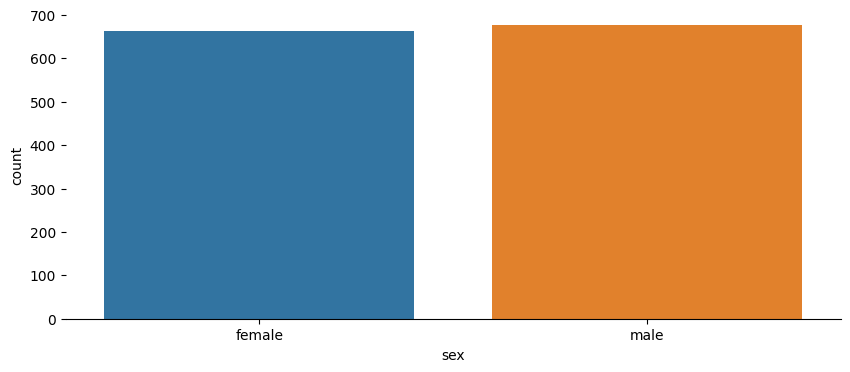

In [13]:
plt.figure(figsize=(10,4)) 
sns.countplot(x="sex",data=df,hue="sex")
sns.despine(left=True)

### Relation between smoker and gender to  charges

<Axes: xlabel='sex', ylabel='charges'>

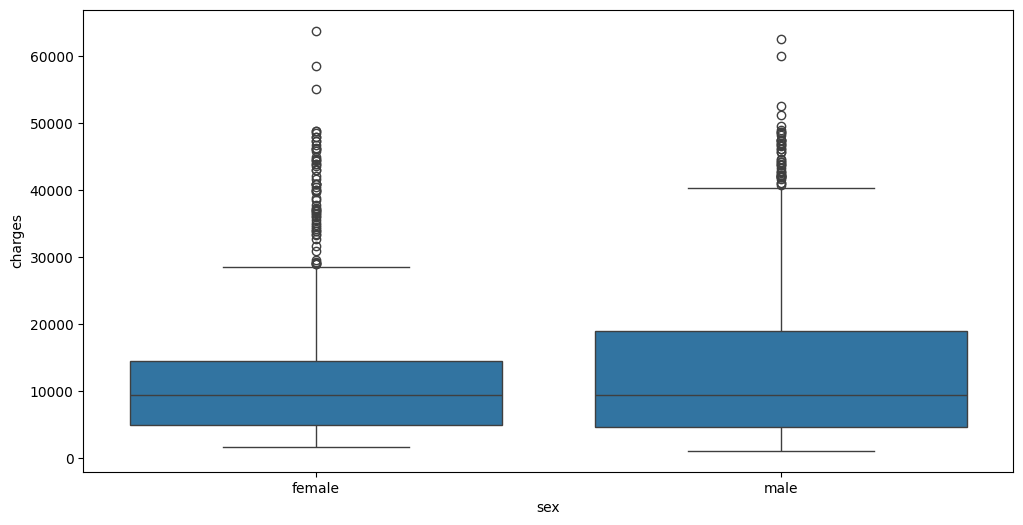

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sex",y="charges",data=df)

<Axes: xlabel='sex', ylabel='charges'>

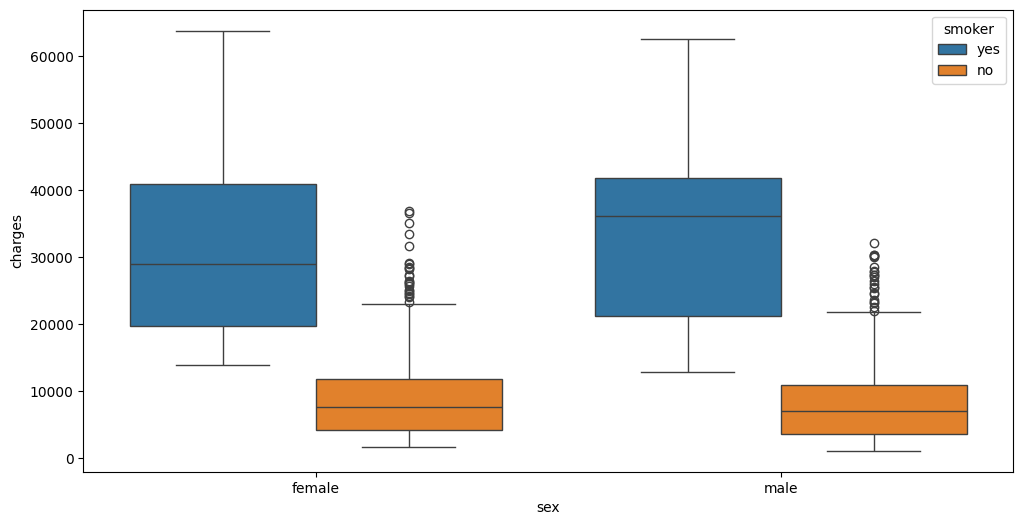

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x="sex",y="charges",data=df,hue="smoker")

## Relation between age and charges

<Axes: xlabel='age', ylabel='charges'>

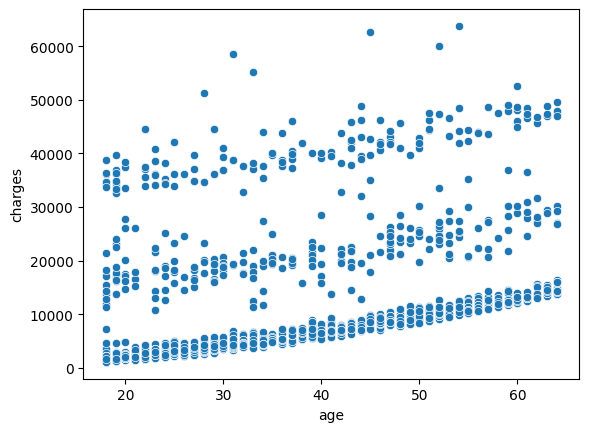

In [16]:
sns.scatterplot(x="age",y="charges",data=df)

## With region in regard

<Axes: xlabel='age', ylabel='charges'>

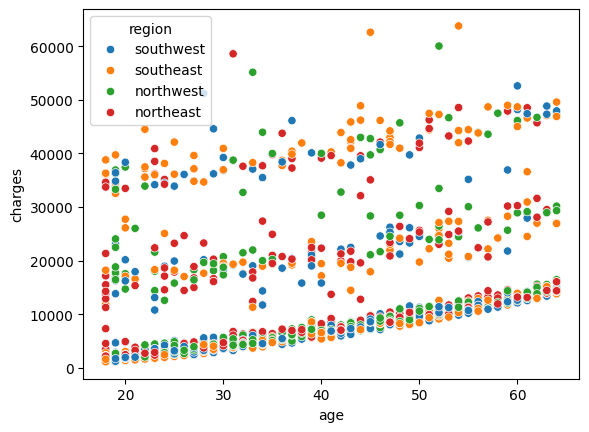

In [17]:
sns.scatterplot(x="age",y="charges",data=df,hue="region")

## With smoking as regard

<Axes: xlabel='age', ylabel='charges'>

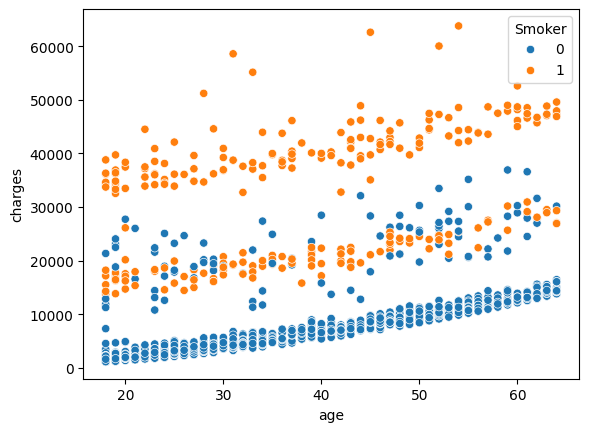

In [18]:
sns.scatterplot(x="age",y="charges",data=df,hue="Smoker")

## Relation btw bmi and charges

<Axes: xlabel='bmi', ylabel='charges'>

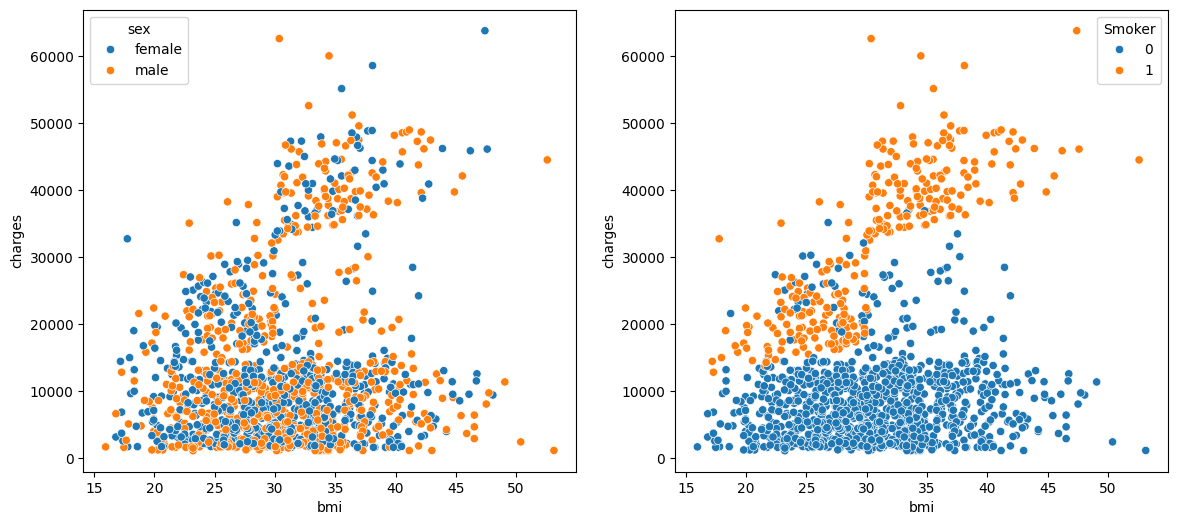

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex",ax=ax[0])
sns.scatterplot(x="bmi",y="charges",data=df,hue="Smoker",ax=ax[1])

## dropping all the unnecessasry variables

In [20]:
df.drop(columns=["smoker","sex","region"],axis=1,inplace=True)

In [21]:
df

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


<Axes: >

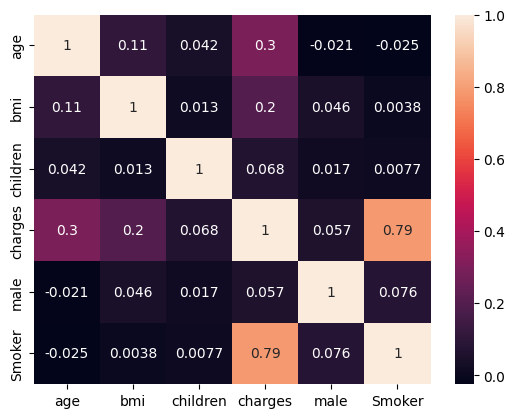

In [22]:
sns.heatmap(df.corr(),annot=True)

## Splitting data

In [23]:
x = df.drop("charges",axis=1)
y=df["charges"]

In [24]:
x

,age,bmi,children,male,Smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [27]:
x_train.shape

(802, 5)

In [28]:
y_train.shape

(802,)

In [29]:
y_test.shape

(536,)

## Scaling the data so the model dosent accumulate bias

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [32]:
scaled_x_train

array([[ 0.70850964,  0.79341468, -0.92629504,  1.00249688, -0.50311529],
       [ 1.64308978,  0.17213606, -0.92629504,  1.00249688,  1.98761598],
       [-0.94497831, -0.29079327, -0.0859233 ,  1.00249688, -0.50311529],
       ...,
       [-0.36985207, -0.55740178, -0.0859233 , -0.99750934, -0.50311529],
       [-0.29796129,  2.00203993,  0.75444845, -0.99750934, -0.50311529],
       [-0.51363363,  0.09538512, -0.0859233 , -0.99750934, -0.50311529]])

## Support Vector Regression Model

In [33]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [34]:
predict = regressor.predict(scaled_x_test)

In [35]:
predict.shape

(536,)

In [36]:
y_test.shape

(536,)

In [37]:
predict[:10]

array([9439.08128188, 9341.48628114, 9449.82676682, 9451.5678616 ,
       9399.07272624, 9380.19063628, 9341.03844179, 9338.30455763,
       9349.43775725, 9370.93952431])

In [38]:
y_test[:10]

1034    12950.07120
112      4646.75900
11      27808.72510
1176    23887.66270
864      8782.46900
756      7985.81500
319      4667.60765
557      3935.17990
346      4889.99950
572      4753.63680
Name: charges, dtype: float64